# Case 1

#  Learn to Compute Basic Descriptive Statistics for Numeric Variables

#### Learning Goal:

The objective of the simulation is to provide hands-on application-oriented understanding of the following concepts,

Measures of Location
Measures of Variability
With the help of video tutorials and reading materials, you will get a good understanding on the above concepts of  'Measures of Location' which summarizes values (mean, median, mode, etc.) and 'Measures of Variability' that describes spread of the data (standard deviation, variance, range, IQR etc.). In this section, we will also focus on applying the knowledge on a real business data and try to interpret results and call out business insights.



#### Business Case:

Jason Smith is a technology hedge fund manager. The only two stocks that he tracks in his portfolio are 

Apple (AAPL)
Microsoft (MSFT)
As a hedge fund manager, he has the need to understand how the stocks in his portfolio are performing. For this he likes to look for an appropriate statistical tool that would provide him high level insight into stock prices to plan his purchase and redemption strategy.

Daily log return is a convenient way to calculate return from investment in stocks. It is calculated by taking natural log of today's stock price divided by yesterday's stock price.

Some of the below mentioned Univariate Measures, will help him draw key insights with respect to log returns from the stocks in his portfolio. 

Mean
Inter-Quartile Range
Standard Deviation
A regular tracking of these measures will help him to devise further investment strategies for risk management (like value at Risk, VaR) or hedging purposes.

In [1]:
# import dictionary
import pandas as pd

dictionary = pd.read_excel(r"D:\Bootcamp Data Science\A Treasure Hunt\Fundamental of Data Analytics\Dictionary_case_1.xlsx")
dictionary

,Variable Name,Variable Description
0,Date,Date for the observed record
1,Open_AAPL,Daily Opening Price of Apple (AAPL).
2,High_AAPL,Daily Highest Price of Apple (AAPL).
3,Low_AAPL,Daily Lowest Price of Apple (AAPL)
4,Close_AAPL,Daily Closing Price of Apple (AAPL)
5,Volume-AAPL,Daily Traded volume of Apple (AAPL)
6,AdjClose_AAPL,Adjusted Closing Price Apple
7,DailyLogRetAAPL,Daily log return (ln (today's adjusted closing...
8,Open_SPX,Daily Opening Price of S&P500 (SPX)
9,High_SPX,Daily Highest Price of S&P500 (SPX)


In [2]:
# import data
df = pd.read_excel(r"D:\Bootcamp Data Science\A Treasure Hunt\Fundamental of Data Analytics\FDA_UnivariateBasicNumericDescStats_Dataset.xlsx")
df

,Date,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume-AAPL,AdjClose_AAPL,DailyLogRetAAPL,Open_SPX,High_SPX,...,Volume_SPX,AdjClose_SPX,DailyLogRetSPX,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,Volume_MSFT,AdjClose_MSFT,DailyLogRetMSFT
0,2000-03-01 00:00:00,104.87,112.50,101.69,111.94,19144400.0,27.87,0.00,1469.25,1478.00,...,9.318000e+08,1455.22,0.00,117.37,118.62,112.00,116.56,53228400.0,44.57,0.00
1,2000-04-01 00:00:00,108.25,110.62,101.19,102.50,18310000.0,25.52,-0.09,1455.22,1455.22,...,1.009000e+09,1399.42,-0.04,113.56,117.12,112.25,112.62,54119000.0,43.06,-0.03
2,2000-05-01 00:00:00,103.75,110.56,103.00,104.00,27818000.0,25.89,0.01,1399.42,1413.27,...,1.085500e+09,1402.11,0.00,111.12,116.37,109.37,113.81,64059600.0,43.52,0.01
3,2000-06-01 00:00:00,106.12,107.00,95.00,95.00,27443200.0,23.65,-0.09,1402.11,1411.90,...,1.092300e+09,1403.45,0.00,112.19,113.87,108.37,110.00,54976600.0,42.06,-0.03
4,2000-07-01 00:00:00,96.50,101.00,95.50,99.50,16463200.0,24.77,0.05,1403.45,1441.47,...,1.225200e+09,1441.47,0.03,108.62,112.25,107.31,111.44,62013600.0,42.61,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,12/23/2005,74.17,74.26,73.30,73.35,8209200.0,73.04,-0.01,1268.12,1269.76,...,1.285810e+09,1268.66,0.00,26.52,26.67,26.44,26.64,30689200.0,23.26,0.00
1504,12/27/2005,74.00,75.18,73.95,74.23,21092500.0,73.91,0.01,1268.66,1271.83,...,1.540470e+09,1256.54,-0.01,26.68,26.85,26.45,26.46,37819000.0,23.10,-0.01
1505,12/28/2005,74.47,74.76,73.32,73.57,14218400.0,73.26,-0.01,1256.54,1261.10,...,1.422360e+09,1258.17,0.00,26.51,26.66,26.35,26.39,35444400.0,23.04,0.00
1506,12/29/2005,73.78,73.82,71.42,71.45,17500900.0,71.14,-0.03,1258.17,1260.61,...,1.382540e+09,1254.42,0.00,26.41,26.50,26.26,26.27,34495500.0,22.93,0.00


In [3]:
# mean
print("Mean of Apple Daily log return is", df["DailyLogRetAAPL"].mean())

Mean of Apple Daily log return is 0.0006034482758620693


In [4]:
print("Mean of Microsoft  Daily log return is", df["DailyLogRetMSFT"].mean())

Mean of Microsoft  Daily log return is -0.00044429708222811664


In [5]:
# Inter Quartile Range
df['IQR_DailyLogRetAAPL'] = df["DailyLogRetAAPL"].quantile(0.75) - df["DailyLogRetAAPL"].quantile(0.25)
print("IQR of Apple  Daily log return is", df['IQR_DailyLogRetAAPL'].unique())

IQR of Apple  Daily log return is [0.04]


In [6]:
df['IQR_DailyLogRetMSFT'] = df["DailyLogRetMSFT"].quantile(0.75) - df["DailyLogRetMSFT"].quantile(0.25)
print("IQR of Microsoft  Daily log return is", df['IQR_DailyLogRetMSFT'].unique())

IQR of Microsoft  Daily log return is [0.02]


In [7]:
# Standard Deviation
print("Standard deviation of Apple  Daily log return is", df["DailyLogRetAAPL"].std())

Standard deviation of Apple  Daily log return is 0.037359343483261434


In [8]:
print("Standard deviation of Microsoft  Daily log return is", df["DailyLogRetMSFT"].std())

Standard deviation of Microsoft  Daily log return is 0.023600894128953456


Conclusion:<br>
AAPL stock more volatile than MSFT stock, because standart deviation of Apple Daily log return > standart deviation of Microsoft Daily log return

# Learn to Compute Basic Bivariate Descriptive Statistic: Correlation

#### Learning Goal:

The objective of the data case is to provide hands-on experience in understanding and applying Correlation.

Correlation is useful to find out the relationship between variables and understand the strength of the relationship. Correlation coefficient is the value which tells us about type and strength of relationship. We will be studying in detail one of such commonly used metric i.e. Pearson Correlation coefficient through this business case. This coefficient measures linear relationship between two variables.

#### Business Case:

Jason Smith is a technology hedge fund manager. The only two stocks that he tracks in his portfolio are 

Apple (AAPL)
Microsoft (MSFT)
To keep a track of his portfolio, we have seen he calculates descriptive measures like 

Mean
Standard Deviation
Range of both these stock prices 
Daily Log Return
Along with daily log return of these two stocks (AAPL and MSFT), he also tracks the S&P Index, measured by the return of SPX (The S&P 500 measures the value of stocks of 500 largest corporations by market capitalization listed on the New York Stock Exchange or Nasdaq Composite). This data is also provided along with the log return values of SPX.

Jason wants to understand whether the daily log return of stocks has any relationship with the S&P index. The relationship can be better understood by computing a Pearson Correlation coefficient between daily log return of the two stocks (AAPL and MSFT) with the S&P Index measured by the return of SPX .

Exploring this relationship will be of some use to Jason for planning his hedging strategies.

In [9]:
# Correlation
correlation = df.corr(method = 'pearson')
correlation

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume-AAPL,AdjClose_AAPL,DailyLogRetAAPL,Open_SPX,High_SPX,Low_SPX,...,DailyLogRetSPX,Open_MSFT,High_MSFT,Low_MSFT,Close_MSFT,Volume_MSFT,AdjClose_MSFT,DailyLogRetMSFT,IQR_DailyLogRetAAPL,IQR_DailyLogRetMSFT
Open_AAPL,1.000000e+00,9.992786e-01,9.992883e-01,9.983938e-01,2.170884e-01,6.343036e-01,5.463862e-03,6.489934e-01,6.509383e-01,6.486938e-01,...,1.082614e-02,3.440706e-01,3.418139e-01,3.427062e-01,3.409138e-01,5.965977e-03,7.185739e-01,-4.810455e-02,1.902743e-15,1.902743e-15
High_AAPL,9.992786e-01,1.000000e+00,9.991152e-01,9.993009e-01,2.181876e-01,6.270547e-01,2.098915e-02,6.509165e-01,6.533824e-01,6.505688e-01,...,1.718326e-02,3.535084e-01,3.515960e-01,3.523289e-01,3.508136e-01,9.838143e-03,7.243343e-01,-4.247583e-02,5.818805e-16,5.818805e-16
Low_AAPL,9.992883e-01,9.991152e-01,1.000000e+00,9.992162e-01,2.144882e-01,6.427747e-01,2.223245e-02,6.459436e-01,6.479208e-01,6.463394e-01,...,1.761662e-02,3.346640e-01,3.326089e-01,3.336635e-01,3.319891e-01,2.189386e-03,7.151901e-01,-4.235732e-02,3.915358e-16,3.915358e-16
Close_AAPL,9.983938e-01,9.993009e-01,9.992162e-01,1.000000e+00,2.166361e-01,6.361445e-01,3.840971e-02,6.469821e-01,6.496108e-01,6.473753e-01,...,2.820396e-02,3.425426e-01,3.407867e-01,3.416866e-01,3.404758e-01,7.351343e-03,7.196251e-01,-3.403785e-02,1.397094e-15,1.397094e-15
Volume-AAPL,2.170884e-01,2.181876e-01,2.144882e-01,2.166361e-01,1.000000e+00,3.201515e-01,-1.747251e-01,2.024991e-01,2.023986e-01,2.033524e-01,...,-1.122494e-02,-1.226530e-01,-1.211091e-01,-1.241198e-01,-1.221896e-01,1.212330e-01,4.129231e-02,1.612719e-02,-1.517031e-15,-1.517031e-15
AdjClose_AAPL,6.343036e-01,6.270547e-01,6.427747e-01,6.361445e-01,3.201515e-01,1.000000e+00,5.155645e-02,4.412631e-01,4.354630e-01,4.520797e-01,...,2.333249e-02,-1.957711e-01,-1.980378e-01,-1.940463e-01,-1.963823e-01,-8.930807e-02,2.751036e-01,-7.264017e-03,-1.098181e-15,-1.098181e-15
DailyLogRetAAPL,5.463862e-03,2.098915e-02,2.223245e-02,3.840971e-02,-1.747251e-01,5.155645e-02,1.000000e+00,-4.984447e-02,-3.222965e-02,-3.050839e-02,...,4.531075e-01,-5.668460e-02,-4.810378e-02,-4.697010e-02,-3.725377e-02,-7.798575e-04,1.708836e-02,3.759977e-01,4.721832e-16,4.721832e-16
Open_SPX,6.489934e-01,6.509165e-01,6.459436e-01,6.469821e-01,2.024991e-01,4.412631e-01,-4.984447e-02,1.000000e+00,9.987848e-01,9.984032e-01,...,-4.666722e-02,5.030542e-01,5.017954e-01,5.029148e-01,5.006426e-01,1.998183e-02,6.977161e-01,-6.097263e-02,-3.460694e-15,-3.460694e-15
High_SPX,6.509383e-01,6.533824e-01,6.479208e-01,6.496108e-01,2.023986e-01,4.354630e-01,-3.222965e-02,9.987848e-01,1.000000e+00,9.982991e-01,...,-9.061606e-03,5.128030e-01,5.121479e-01,5.129518e-01,5.113693e-01,2.973186e-02,7.029665e-01,-3.520518e-02,-2.696654e-15,-2.696654e-15
Low_SPX,6.486938e-01,6.505688e-01,6.463394e-01,6.473753e-01,2.033524e-01,4.520797e-01,-3.050839e-02,9.984032e-01,9.982991e-01,1.000000e+00,...,-7.382453e-03,4.881076e-01,4.870284e-01,4.887754e-01,4.866503e-01,5.404011e-03,6.958733e-01,-3.661612e-02,1.738127e-14,1.738127e-14


In [10]:
correlation_DailyLogRetAAPL_DailyLogRetMSFT = df[['DailyLogRetAAPL', 'DailyLogRetMSFT']].corr(method = 'pearson')
correlation_DailyLogRetAAPL_DailyLogRetMSFT

,DailyLogRetAAPL,DailyLogRetMSFT
DailyLogRetAAPL,1.000000,0.375998
DailyLogRetMSFT,0.375998,1.000000


Pearson Correlation coefficient between daily log return of the two stocks (AAPL and MSFT) is 0.375998.

Conclusion:<br>
The relationship between daily log return of the two stocks (AAPL and MSFT) is that when AAPL goes up, MSFT also goes up, and vice versa.

# Learn to detect deviation of Data from Normality using Skewness & Kurtosis

Learning Goal:

This data case will help you understand the different metrics considered for testing normality of the data. The normal distribution is one of the most important probability distribution in statistics, with wide ranging applications in advanced techniques. 

Majority of continuous data follows normal distribution, so it becomes important to understand how to check whether a given data follows normal distribution or not. To test the normality of data, we will focus on two different approaches in this data case, as follows,

Skewness - Skewness measures symmetry of a distribution. It is equal to 0 for a normal distribution. Any value other than 0 will represent non-normality. Skewness with a negative value indicate that the data is skewed to the left. Positive values for skewness indicate that the data are skewed right.
Kurtosis - Kurtosis measures flatness of the probability distribution of real valued random variable. It measures the amount of probability in the tails. The value is often compared to the kurtosis of the normal distribution, which is equal to 3.


Business Case:

As seen in the previous module, Jason Smith is a technology hedge fund manager. By using the univariate and bivariate staistics like, summary statistics and correlation, he is able to track the performance of the two stocks in his portfolio i.e Apple (AAPL) and Microsoft (MSFT).

To further evaluate these stocks, he wants to understand underlying distribution of the performance of his stocks. For this he wants to test if the daily log return of the two premium stocks of his portfolio Apple (AAPL) and Microsoft (MSFT) is normal or not.

In [11]:
# Skewness
df['DailyLogRetAAPL'].skew()

-4.9961156249550385

In [12]:
df['DailyLogRetMSFT'].skew()

-0.21643527021480816

In [13]:
# Kurtosis
df['DailyLogRetAAPL'].kurtosis()

97.50561294726704

In [14]:
df['DailyLogRetMSFT'].kurtosis()

7.636535526896543

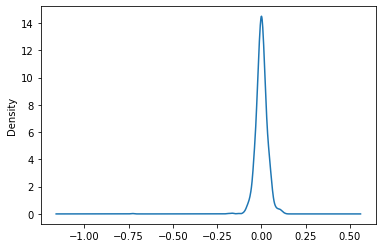

In [15]:
# Density plot
df['DailyLogRetAAPL'].plot.density()

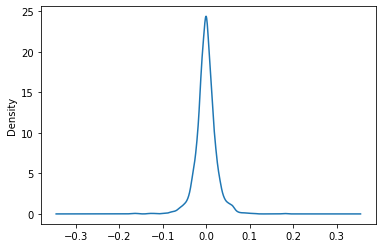

In [16]:
df['DailyLogRetMSFT'].plot.density()

Conclusion:<br>
Daily log return of the two premium stocks of his portfolio Apple (AAPL) and Microsoft (MSFT) is not normal distribution.

# Learn to Test for Normality of Data using Shapiro-Wilk Normality Test

Learning Goal:

In the previous data case we have covered the statistical measures to test for normality of the data. Taking the discussion forward in this data case, we will take a look at Statistical tests that can be leveraged to confirm normality of data.

One such test to check for normality is the Shapiro-Wilk Normality test and it will be focus of this data case. This is a most frequently used test used to determine whether sample data has been drawn from a normally distributed population (within some tolerance). 

Statistical tests for normality are more precise than other visual methods (like Q-Q plots or frequency plots) since actual probabilities are calculated.



Business Case:

Jason a portfolio risk manager followed the numerical methods (Kurtosis and Skewness) to test Normality of performance distribution of the two premium stocks Apple(APPL) and Microsoft (MSFT).

For risk vs benefit analysis of his two stocks, he wants to take more informed decision on the normality of the daily log return of the two stocks. For this purpose, he relies on a statistical test, namely Shapiro-Wilk Normality test.

In [17]:
from scipy.stats import shapiro
stat, p = shapiro(df['DailyLogRetAAPL'])
print('statistics=%.3f, p=%.3f' % (stat, p))

statistics=0.794, p=0.000


In [18]:
stat, p = shapiro(df['DailyLogRetMSFT'])
print('statistics=%.3f, p=%.3f' % (stat, p))

statistics=0.905, p=0.000


Conclusion:<br>
Daily log return of the two premium stocks of his portfolio Apple (AAPL) and Microsoft (MSFT) is not normal distribution.

# Learn to Compute One Sample One Tailed t-Test

Learning Goal:

The objective of the data case is to provide hands on understanding about some of the basic hypothesis tests,

One sample t-test
One sample Z test
The t-test and Z-test are parametric tests. The t-test is used when the true variance of the population from which the sample has been drawn is unknown, while Z-test is used when variance is known. Alternatively, t-test is a small sample test, while Z-test is considered to be a large sample test.

 

Business Case:

Jason Smith portfolio risk manager decided to further evaluate his stocks portfolio i.e Apple (AAPL) and Microsoft (MSFT), after getting insights from descriptive statics and checking distributions.

It is often important for Jason to get an idea if the stock return is greater or less than a certain value as it helps him to optimize his portfolio. 

In this data case, we want to test if average daily log return of Apple is greater than 5% or 0.05. This is done by defining appropriate 'Null' and 'Alternate' hypothesis to test if average daily log return of Apple is greater than 5% or 0.05.

The p value of the t-Test and z-Test can be used to make conclusions for the test at desired level of significance.

In [19]:
# for large samples we can use z-test in place of t-test
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['DailyLogRetAAPL'], x2=None, value=0.05, alternative='larger', usevar='pooled', ddof=1.0)
print(float(ztest))
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-51.34498930728753
1.0
accept null hypothesis


In [20]:
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df['DailyLogRetMSFT'], x2=None, value=0.05, alternative='larger', usevar='pooled', ddof=1.0)
print(float(ztest))
print(float(pval))
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

-83.00118423392753
1.0
accept null hypothesis
